In [1]:


import numpy as np


In [1]:
import math
from time import sleep
reach_threshold = 0.1
dis_threshold = 0.1
def convert_angle(delta_x,delta_y):
    if(delta_x == 0):      #special case when x = 0 
        if(delta_y == 0):          #reach the destination
            return None
        elif(delta_y > 0):     
            return 90
        else:
            return -90
    temp = delta_y / delta_x
    
    if(delta_x > 0): #in case from -90 to 90 degree
        return math.degrees(math.atan(temp))
    else:
        
        if(delta_y > 0):  #case for 90 to 180 degree
            return 180 + math.degrees(math.atan(temp))
        else:       #case for -180 to -90 degree
            return math.degrees(math.atan(temp)) + 180 - 360
        
        
def update_info_straight(curr_x,curr_y,curr_angle, time):    #for keep space
    speed = 1       #currently defalut 1, can use calibration to change that
    curr_x = curr_x + math.cos(math.radians(curr_angle)) * time * speed
    curr_y = curr_y + math.sin(math.radians(curr_angle)) * time * speed

    return curr_x,curr_y

def reach_destination(curr_x, x, curr_y, y):  
    distance_apart = math.sqrt((curr_x - x)**2 + (curr_y - y)**2)       #use to calculate the distance from the destination to current lcoation
    
    if(distance_apart < dis_threshold): #within a range, then it mean it is close to the destination, then it return true.
        return True
    else:
        return False
    
def check_angle(angle):     #use to convert the angle to be between -180 to 180 degree
    if(angle > 180):
        return -180 + angle - 180
    elif(angle < -180):
        return 180 + angle + 180
    else:
        return angle

In [3]:
curr_x = -2          #use to keep track on the x of the car current status
curr_y = 0        #use to keep track on the y of the car current status
curr_angle = 0      #use to keep track on the angle of the car current status, range from -180 to 180. 0 indicate straight
des_x = 1
des_y = 0
spin_time = 0.5

In [2]:
import math

def has_obstacle(x, y, angle):
    if x <= -1:
        if y + (-1-x) * math.tan(angle) > 1 :
            return False
        if y + (-1-x) * math.tan(angle) < -1 :
            return False
        dis = (-1-x)/ math.cos(angle)
    else:
        return False
    
    if dis < 0.5:
        return True
    else:
        return False

In [8]:

    
def update(prob_blocked):
    global curr_x, curr_y, curr_angle 
    global des_x, des_y, spin_time, ended
    
    if ended:
        return
    
    if not des_x or not des_y:
        print("hahaha")
    
    if reach_destination(curr_x, des_x, curr_y, des_y):
        #camera.unobserve(update, names='value')
        print("stop")
        ended = True
        return 
        #robot.stop()

    print("current location", curr_x, curr_y, curr_angle)
    x_array.append(curr_x)
    y_array.append(curr_y)
    # we apply the `softmax` function to normalize the output vector so it sums to 1 (which makes it a probability distribution)
    
 
    
    if not has_obstacle(curr_x, curr_y, curr_angle): #if no object
        target_angle = convert_angle(des_x - curr_x, des_y - curr_y)
        angle_diff = target_angle - curr_angle
        print(target_angle)
        if abs(angle_diff) > 0.02: 
                #not pointing at the correct angle 
                #adjust to the left while going straight if angle is negative and right if angle is positive

            #time_to_turn = spin_time / abs(angle_different)     #calculate how long does the spin need to be
            curr_x, curr_y = update_info_straight(curr_x,curr_y,curr_angle, 0.01) 
            #sleep(time_to_turn)     #sleep to wait until the car turn enough
            curr_angle = target_angle    #x and y did not change, only the angle change to the target value in this case.
        else:
            #go straight 
            #straight()
            #sleep(0.1)
            curr_x, curr_y = update_info_straight(curr_x,curr_y,curr_angle, 0.0001)   

            
    else:
        #spin_left()
        #sleep(0.1)
        curr_angle = check_angle(curr_angle + 0.5)  #make sure the angle is between -180 to 180 degree
        #straight()
        #sleep(0.5)
        #curr_x, curr_y = update_info_straight(curr_x, curr_y,curr_angle,0.1)
        
    
        
        


In [4]:
line_x_array = []
line_y_array = []
for i in (-1, 1, 0.00001):
    line_x_array.append(-1)
    line_y_array.append(i)
    
    

In [9]:
curr_x = -2          #use to keep track on the x of the car current status
curr_y = 0        #use to keep track on the y of the car current status
curr_angle = 0      #use to keep track on the angle of the car current status, range from -180 to 180. 0 indicate straight
des_x = 1
des_y = 0
spin_time = 0.5
ended = False
x_array = []
y_array = []
prob = 0.3

for i in range(100000):
    prob = 0.3
    
    
    update(prob)

46163
hahaha
current location 0.8810239707305569 0.002861259379789892 -1.3725068411758126
-1.3776429894740865
hahaha
current location 0.8811239420403945 0.002858864132544492 -1.3725068411758126
-1.3776473088162247
hahaha
current location 0.881223913350232 0.002856468885299092 -1.3725068411758126
-1.3776516354293444
hahaha
current location 0.8813238846600695 0.002854073638053692 -1.3725068411758126
-1.3776559693318204
hahaha
current location 0.881423855969907 0.002851678390808292 -1.3725068411758126
-1.3776603105420897
hahaha
current location 0.8815238272797445 0.002849283143562892 -1.3725068411758126
-1.3776646590786512
hahaha
current location 0.8816237985895821 0.002846887896317492 -1.3725068411758126
-1.3776690149600666
hahaha
current location 0.8817237698994196 0.0028444926490720918 -1.3725068411758126
-1.3776733782049604
hahaha
current location 0.8818237412092571 0.0028420974018266917 -1.3725068411758126
-1.3776777488320198
hahaha
current location 0.8819237125190946 0.0028397021545

In [8]:
print(x_array)

[-2, -1.9999, -1.9998, -1.9997, -1.9996, -1.9995, -1.9994, -1.9993, -1.9992, -1.9991, -1.999, -1.9989000000000001, -1.9988000000000001, -1.9987000000000001, -1.9986000000000002, -1.9985000000000002, -1.9984000000000002, -1.9983000000000002, -1.9982000000000002, -1.9981000000000002, -1.9980000000000002, -1.9979000000000002, -1.9978000000000002, -1.9977000000000003, -1.9976000000000003, -1.9975000000000003, -1.9974000000000003, -1.9973000000000003, -1.9972000000000003, -1.9971000000000003, -1.9970000000000003, -1.9969000000000003, -1.9968000000000004, -1.9967000000000004, -1.9966000000000004, -1.9965000000000004, -1.9964000000000004, -1.9963000000000004, -1.9962000000000004, -1.9961000000000004, -1.9960000000000004, -1.9959000000000005, -1.9958000000000005, -1.9957000000000005, -1.9956000000000005, -1.9955000000000005, -1.9954000000000005, -1.9953000000000005, -1.9952000000000005, -1.9951000000000005, -1.9950000000000006, -1.9949000000000006, -1.9948000000000006, -1.9947000000000006, -1.

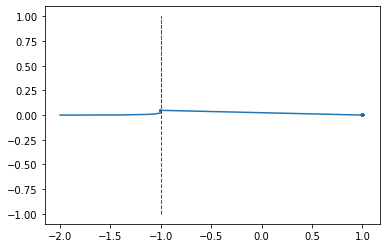

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_array, y_array, '-')
plt.plot(line_x_array, line_y_array,color='red',linewidth=1,linestyle='--')

In [5]:
def funcc(x, y):
    x = x + 1
    y = y + 1
    return x,y

In [6]:
a = 1
b = 1
a, b = funcc(a, b)

In [7]:
print(a)

2


In [69]:
math.tan(2)

-2.185039863261519